# Explore here

In [12]:
import numpy as np
import pandas as pd 
import zipfile
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from PIL import Image
import os

####  El Archivo esta fuera del directorio del proyecto.  Es muy grande para subirlo al git.  Asi que este proyecto lo hice en local.  El ARCHIVO CONTIENE 12500 fotos de perro y 12500 fotos de Gato.  Estan todas en un zip llamado **"cats_and_dogs_filtered.zip"**  Que al descomprimirse tiene las 25000 fotos en un mismo directoro.

In [3]:
# Ubicacion del Zip
zip_file_directory = "../../imagenes/cats_and_dogs_filtered.zip"
# Directorio donde voy a descomprimir el Zip
extract_directory = "../../imagenes/"

# Proceso de extraccion
with zipfile.ZipFile(zip_file_directory, "r") as files:
    files.extractall(extract_directory)

In [5]:
# Primero vamos a lsitar todos los archivos que estan en el directorio.  Al descomprimirse los archivos estan en **"/imagenes/cats_and_dogs_filtered"**
files = os.listdir("../../imagenes/cats_and_dogs_filtered")
print(files)

['cat_2448.jpg', 'cat_2451.jpg', 'cat_2467.jpg', 'cat_247.jpg', 'cat_2471.jpg', 'cat_2472.jpg', 'cat_2475.jpg', 'cat_248.jpg', 'cat_2481.jpg', 'cat_2482.jpg', 'cat_2483.jpg', 'cat_2491.jpg', 'cat_2519.jpg', 'cat_2522.jpg', 'cat_2525.jpg', 'cat_253.jpg', 'cat_2534.jpg', 'cat_2535.jpg', 'cat_2537.jpg', 'cat_256.jpg', 'cat_2564.jpg', 'cat_257.jpg', 'cat_2570.jpg', 'cat_2573.jpg', 'cat_2596.jpg', 'cat_2597.jpg', 'cat_2599.jpg', 'cat_2601.jpg', 'cat_2603.jpg', 'cat_2611.jpg', 'cat_2617.jpg', 'cat_2628.jpg', 'cat_2635.jpg', 'cat_2636.jpg', 'cat_2637.jpg', 'cat_2641.jpg', 'cat_2643.jpg', 'cat_2652.jpg', 'cat_2662.jpg', 'cat_2667.jpg', 'cat_2672.jpg', 'cat_2673.jpg', 'cat_2674.jpg', 'cat_2694.jpg', 'cat_2697.jpg', 'cat_27.jpg', 'cat_2705.jpg', 'cat_2712.jpg', 'cat_2718.jpg', 'cat_272.jpg', 'cat_2723.jpg', 'cat_2727.jpg', 'cat_2730.jpg', 'cat_2738.jpg', 'cat_2741.jpg', 'cat_275.jpg', 'cat_2753.jpg', 'cat_2760.jpg', 'cat_2766.jpg', 'cat_278.jpg', 'cat_2780.jpg', 'cat_2786.jpg', 'cat_279.jpg', 'c

In [6]:
# Todos los archivos tienen la palabra dog o cat en su nombre.  con eso podemos crear una columna que asocie el nombre 
# Del archivo y su contenido con la informacion que tiene dentro.

categories = ['dog' if file.split('_')[0] == 'dog' else 'cat' for file in files]

total_data = pd.DataFrame({'filename': files, 'category': categories})
total_data.head()

,filename,category
0,cat_2448.jpg,cat
1,cat_2451.jpg,cat
2,cat_2467.jpg,cat
3,cat_247.jpg,cat
4,cat_2471.jpg,cat


In [7]:
print(total_data['category'].value_counts())

category
dog    1879
cat    1239
Name: count, dtype: int64


In [26]:
#vamos a crear dos Dataframes con esas dos columnas.  Una para el traning y otra para el test.
#  Vamos a Separarla con al 20% y con un randon_state de 42

train_data, test_data = train_test_split(total_data, test_size=0.20, random_state=42)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [27]:
print(train_data['category'].value_counts())

category
dog    10015
cat     9985
Name: count, dtype: int64


#### No quedo perfectamente simetrico el Split paro la cantidad de muestaras de dog solo tienen 30 muestas mas que los cats.

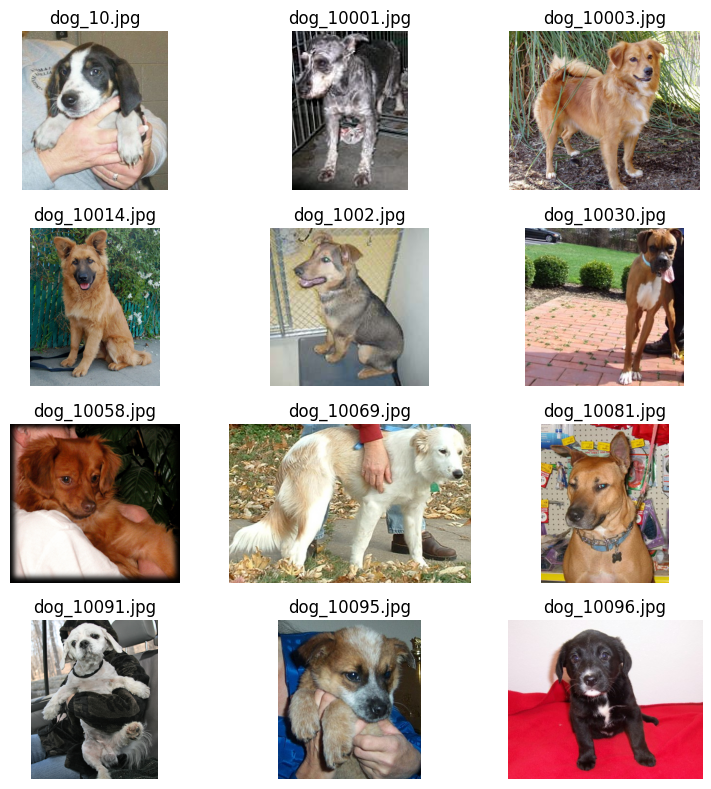

In [13]:
def mostrar_fotos(nfilas,ncolum,animale,directoio):
    imagenes = [file for file in files if file.startswith(animale)] #filtro solo los perros

    imagenes_prueba = []
    for i in range(12):
        imagenes_prueba.append(imagenes[i])

    fig, axes = plt.subplots(nfilas, ncolum, figsize=(8, 8))

    for i, ax in enumerate(axes.flat):
        img_path = os.path.join(directoio, imagenes_prueba[i])  
        img = Image.open(img_path)  
        ax.imshow(img) 
        ax.axis("off")  
        ax.set_title(imagenes_prueba[i])  

    plt.tight_layout()
    plt.show()


mostrar_fotos(4,3,'dog',"../../imagenes/cats_and_dogs_filtered")


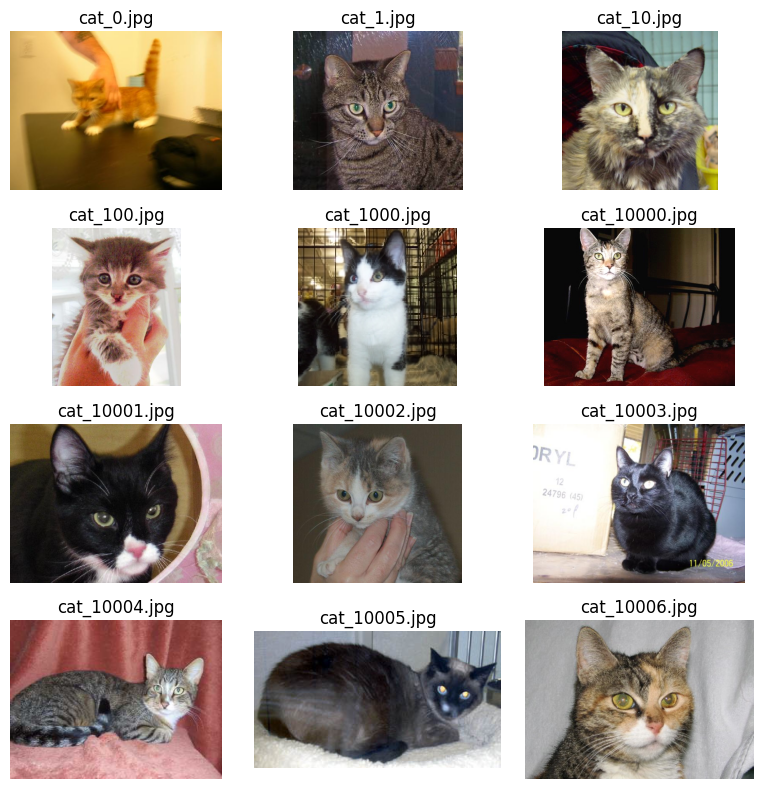

In [ ]:

mostrar_fotos(4,3,'cat',"../../imagenes/cats_and_dogs_filtered")


In [14]:
from PIL import Image

folder = "../../imagenes/cats_and_dogs_filtered"

target_size = (200, 200)
filenames = os.listdir(folder)

for filename in filenames:
    img_path = os.path.join(folder, filename)  
        
    try:
        img = Image.open(img_path).resize(target_size)
        img.save(img_path)
        
    except Exception as e:
        print(f"Error procesando {filename}: {e}")